In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import spearmanr,pearsonr
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


def get_euler_dist(v1, v2):
    vi = np.array(v1).reshape([-1])
    vj = np.array(v2).reshape([-1])
    return np.sqrt(np.sum(np.square(vi - vj)))


def get_cos_similar(v1, v2):
    vi = np.array(v1).reshape([-1])
    vj = np.array(v2).reshape([-1])

    num = float(np.dot(vi, vj))  # 向量点乘
    denom = np.linalg.norm(vi) * np.linalg.norm(vj)  # 求模长的乘积
    return (num / denom) if denom != 0 else 0

In [179]:
def normalization(matrix):
    sum = np.sqrt(np.sum(matrix ** 2, axis=1, keepdims=True))  # 求数组的正平方根
    nor_matrix = matrix / sum
    return nor_matrix


def spect_decomp_no_norm(df):
    adjacentMatrix = np.array(df)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    LaplacianMatrix_normalized = np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
    lam, H = np.linalg.eig(LaplacianMatrix_normalized)

    t = np.argsort(lam)
    H = np.c_[H[:, t[0]], H[:, t[1]]]
    H = np.real(H)

    return H

def spect_decomp_abs(df):
    adjacentMatrix = np.array(df)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    LaplacianMatrix_normalized = np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
    lam, H = np.linalg.eig(LaplacianMatrix_normalized)

    t = np.argsort(lam)
    H = np.c_[H[:, t[0]], H[:, t[1]]]
    H = np.absolute(H)

    return H

def spect_decomp(df):
    adjacentMatrix = np.array(df)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    LaplacianMatrix_normalized = np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
    lam, H = np.linalg.eig(LaplacianMatrix_normalized)

    t = np.argsort(lam)
    H = np.c_[H[:, t[0]], H[:, t[1]]]
    H = np.real(normalization(H))

    return H

def spect_clustering(df, number=20):
    H = spect_decomp(df)
    model = KMeans(n_clusters=number, n_init='auto', random_state=42)
    model.fit(H)
    labels = model.labels_

    return labels

In [150]:
df_sem = pd.read_csv('./sem_dist.csv')
df_sem.index = list(df_sem['Unnamed: 0'])
df_sem.drop(columns='Unnamed: 0', inplace=True)

df_smi = pd.read_csv('./smi_dist.csv')
df_smi.index = list(df_smi['Unnamed: 0'])
df_smi.drop(columns='Unnamed: 0', inplace=True)

df_ato = pd.read_csv('./ato_dist.csv')
df_ato.index = list(df_ato['Unnamed: 0'])
df_ato.drop(columns='Unnamed: 0', inplace=True)

In [151]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

df_add = pd.read_csv("./rg_smt_smi_atm_geo.csv")
df_add["semantic"] = df_add["semantic"].apply(lambda x: [float(i) for i in x[1:-1].split()])
df_add["smile"] = df_add["smile"].apply(lambda x: [float(i) for i in x[1:-1].split()])
df_add["atomic"] = df_add["atomic"].apply(lambda x: [float(i) for i in x[1:-1].split()])
df_add

,name,word_freq,semantic,smile,atomic,geometric
0,(+)-aspidospermidine,15,"[0.17337348, -0.3568789, 0.03349426, -0.342206...","[-0.744335949, 0.0923662633, -0.357910395, -0....","[-16.981401, -16.848295, -17.021622, -16.97840...",['PATZIW']
1,(-)-Adrenaline,21,"[0.378266782, 0.0607172847, 0.3967686, -0.0202...","[-0.814905405, -0.25902012, 0.0981947482, -0.6...","[-18.417313, -18.03368, -18.445927, -18.368427...",['ADRENL']
2,(-)-Epicatechin,129,"[-0.13416506, 0.02672044, 0.328929, -0.3376658...","[-0.776835263, -0.0564182363, 0.0696076825, -0...","[-18.111425, -16.734394, -18.118, -18.050484, ...",['COWHUR']
3,(-)-Noradrenaline,23,"[0.0655271113, -0.122308001, -0.0707869977, -0...","[-0.79306275, -0.2277208, -0.02243627, -0.2832...","[-18.143618, -17.221077, -18.143715, -18.07799...",['NADREN']
4,(-)-deoxypodophyllotoxin,10,"[0.05425612, -0.5526235, 0.5274869, -0.3697647...","[-0.834411085, 0.137109548, 0.222313315, -0.25...","[-17.632042, -16.738024, -17.664902, -17.60105...","['VAXXOH01', 'YOQXOU']"
...,...,...,...,...,...,...
959,viridicatin,28,"[-0.15006746, -0.912956, 0.22810888, -0.819405...","[-1.22181594, -0.388474464, 0.142942384, 0.059...","[-17.489208, -18.226345, -17.499388, -17.40784...",['DOJHAO01']
960,virosecurinine,45,"[0.00989494, -0.27823803, 0.17010885, -0.44197...","[-0.0739553794, 0.285954088, 0.240951285, -0.3...","[-17.924335, -17.615856, -17.95199, -17.909348...",['FIDTEU']
961,voacamine,64,"[0.38762978, -0.37111285, -0.10875563, -0.5215...","[-0.772047281, -0.0536762737, -0.0230637938, -...","[-17.086731, -17.633154, -17.118664, -17.07161...",['YURFAV']
962,weddellite,281,"[0.15016489, -0.48716843, -0.05625443, 0.07016...","[-0.223173782, 0.052875869, 0.387791097, 0.547...","[-17.957497, -9.687341, -17.9029, -17.919159, ...","['GADTAK', 'WHWLTB01']"


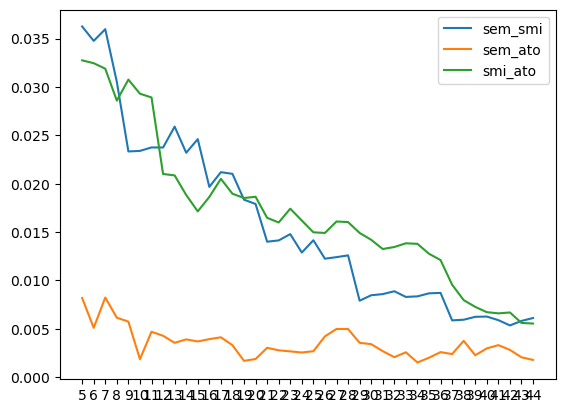

In [152]:
sem_smi = []
sem_ato = []
smi_ato = []

for i in range(5, 45):
    sem_label = spect_clustering(df_sem, number=i)
    smi_label = spect_clustering(df_smi, number=i)
    ato_label = spect_clustering(df_ato, number=i)

    sem_smi.append(adjusted_rand_score(sem_label, smi_label))
    sem_ato.append(adjusted_rand_score(sem_label, ato_label))
    smi_ato.append(adjusted_rand_score(smi_label, ato_label))
plt.plot(range(5, 45), sem_smi, label="sem_smi")
plt.plot(range(5, 45), sem_ato, label="sem_ato")
plt.plot(range(5, 45), smi_ato, label="smi_ato")
plt.xticks(range(5, 45))
plt.legend()
plt.show()

#outlier, cluster size of three clustering

In [197]:
sem_decomp = spect_decomp_no_norm(df_sem)
smi_decomp = spect_decomp_no_norm(df_smi)
ato_decomp = spect_decomp_no_norm(df_ato)

print(spearmanr(sem_decomp[:, 1], smi_decomp[:, 1]))
print(spearmanr(sem_decomp[:, 1], ato_decomp[:, 1]))
print(spearmanr(smi_decomp[:, 1], ato_decomp[:, 1]))

SpearmanrResult(correlation=-0.18057412657251454, pvalue=1.6448520094257158e-08)
SpearmanrResult(correlation=-0.09037276484455856, pvalue=0.004984522718717473)
SpearmanrResult(correlation=-0.11566077584929729, pvalue=0.0003200579495896716)


In [199]:
print(spearmanr(sem_decomp[:, 0], smi_decomp[:, 0]))
print(spearmanr(sem_decomp[:, 0], ato_decomp[:, 0]))
print(spearmanr(smi_decomp[:, 0], ato_decomp[:, 0]))

SpearmanrResult(correlation=0.23148866793679707, pvalue=3.411162253079912e-13)
SpearmanrResult(correlation=-0.015288768295977011, pvalue=0.6354265742354167)
SpearmanrResult(correlation=0.2256004737040463, pvalue=1.3705761591978267e-12)


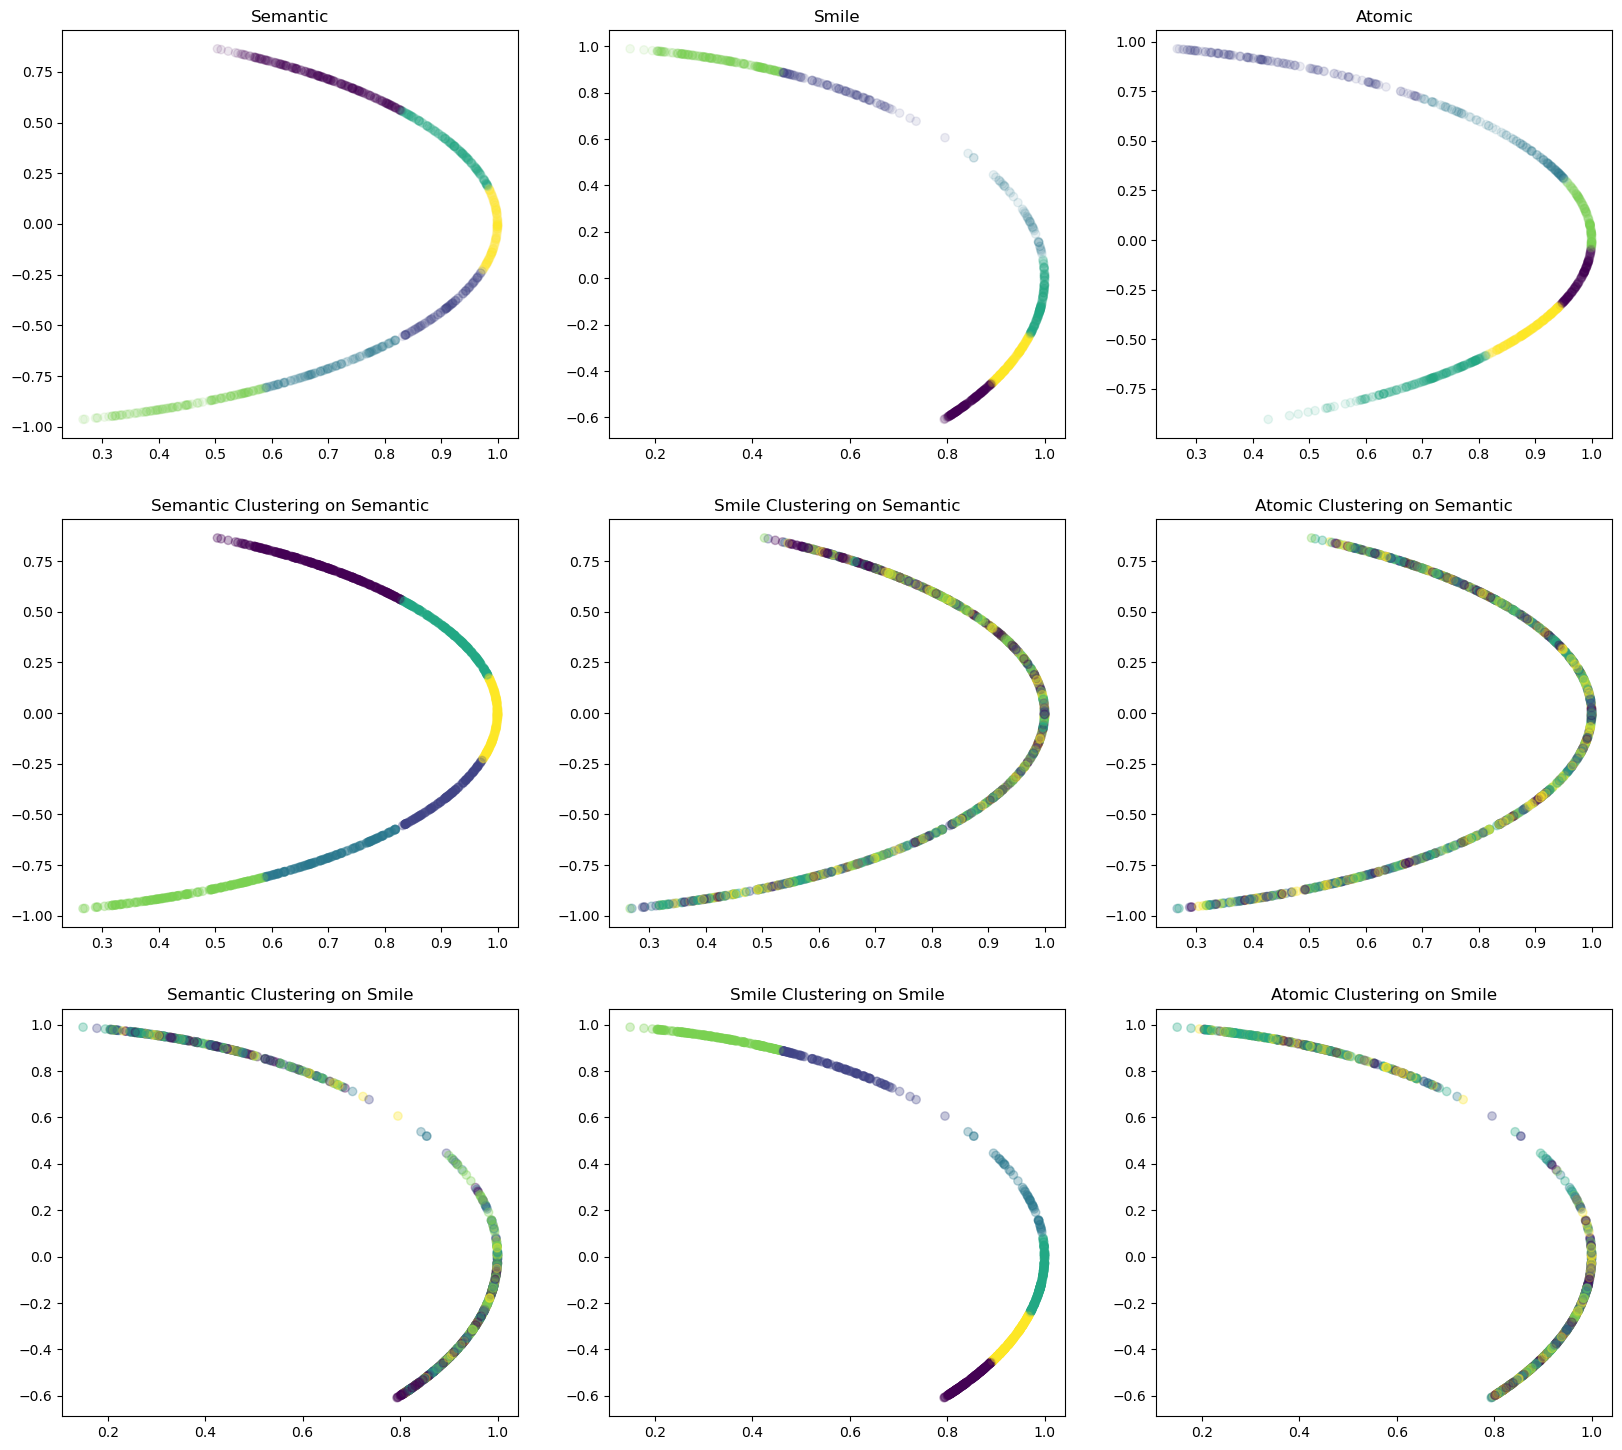

In [185]:
sem_label = spect_clustering(df_sem, number=6)
smi_label = spect_clustering(df_smi, number=6)
ato_label = spect_clustering(df_ato, number=6)

fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes[0, 0].set_title('Semantic')
axes[0, 0].scatter(sem_decomp[:, 0], sem_decomp[:, 1], c=sem_label, alpha=0.1)
axes[0, 1].set_title('Smile')
axes[0, 1].scatter(smi_decomp[:, 0], smi_decomp[:, 1], c=smi_label, alpha=0.1)
axes[0, 2].set_title('Atomic')
axes[0, 2].scatter(ato_decomp[:, 0], ato_decomp[:, 1], c=ato_label, alpha=0.1)

axes[1, 0].set_title('Semantic Clustering on Semantic')
axes[1, 0].scatter(sem_decomp[:, 0], sem_decomp[:, 1], c=sem_label, alpha=0.3)
axes[1, 1].set_title('Smile Clustering on Semantic')
axes[1, 1].scatter(sem_decomp[:, 0], sem_decomp[:, 1], c=smi_label, alpha=0.3)
axes[1, 2].set_title('Atomic Clustering on Semantic')
axes[1, 2].scatter(sem_decomp[:, 0], sem_decomp[:, 1], c=ato_label, alpha=0.3)

axes[2, 0].set_title('Semantic Clustering on Smile')
axes[2, 0].scatter(smi_decomp[:, 0], smi_decomp[:, 1], c=sem_label, alpha=0.3)
axes[2, 1].set_title('Smile Clustering on Smile')
axes[2, 1].scatter(smi_decomp[:, 0], smi_decomp[:, 1], c=smi_label, alpha=0.3)
axes[2, 2].set_title('Atomic Clustering on Smile')
axes[2, 2].scatter(smi_decomp[:, 0], smi_decomp[:, 1], c=ato_label, alpha=0.3)
plt.show()
# no normalization & clustering
# absolute value & clustering

(array([246.,   0., 127.,   0., 134.,   0., 173.,   0., 151., 133.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

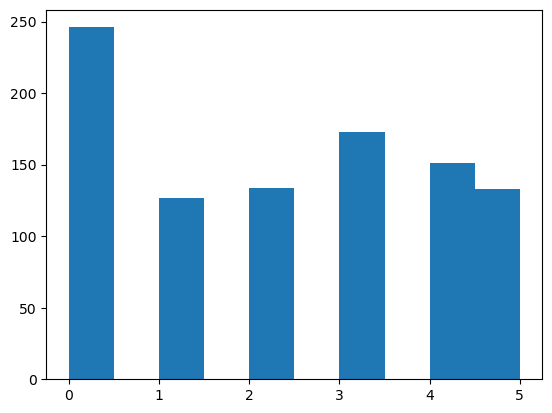

In [190]:
plt.hist(sem_label)

(array([214.,   0., 104.,   0.,  47.,   0., 177.,   0., 198., 224.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

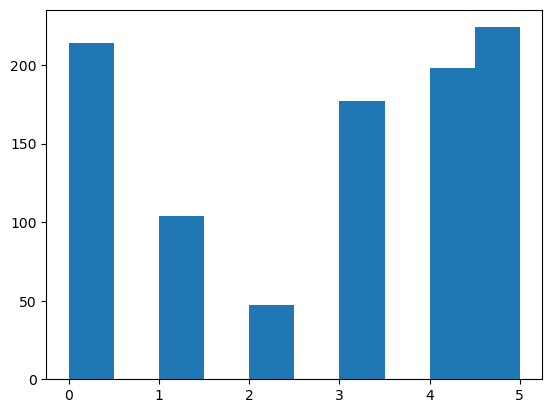

In [191]:
plt.hist(smi_label)

(array([154.,   0., 130.,   0., 115.,   0., 203.,   0., 138., 224.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

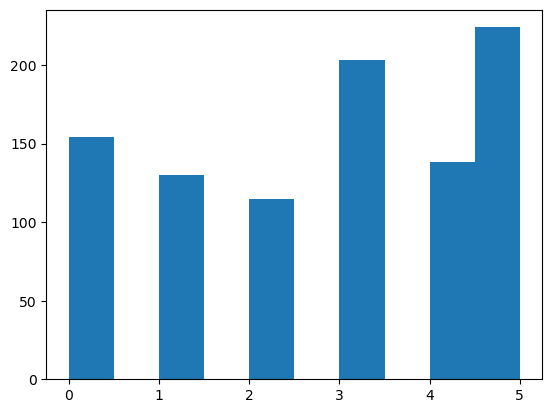

In [192]:
plt.hist(ato_label)

In [156]:
df_decomp = pd.DataFrame({
    'name': list(df_add.name),
    'word_freq': list(df_add.word_freq),
    'semantic': sem_decomp[:, 1],
    'semantic_label': sem_label,
    'smile': smi_decomp[:, 1],
    'smile_label': smi_label,
    'atomic': ato_decomp[:, 1],
    'atomic_label': ato_label
})
df_decomp.index = list(df_decomp.name)
df_decomp

,name,word_freq,semantic,semantic_label,smile,smile_label,atomic,atomic_label
(+)-aspidospermidine,(+)-aspidospermidine,15,0.780314,0,-0.240753,3,-0.476292,5
(-)-Adrenaline,(-)-Adrenaline,21,-0.917128,4,-0.120640,3,-0.356607,5
(-)-Epicatechin,(-)-Epicatechin,129,-0.849148,4,-0.202792,3,0.336692,2
(-)-Noradrenaline,(-)-Noradrenaline,23,-0.798677,2,0.061852,3,-0.194188,0
(-)-deoxypodophyllotoxin,(-)-deoxypodophyllotoxin,10,-0.586439,2,-0.130743,3,-0.261547,0
...,...,...,...,...,...,...,...,...
viridicatin,viridicatin,28,0.163947,5,-0.437078,5,-0.341789,5
virosecurinine,virosecurinine,45,-0.782317,2,0.794321,1,-0.426259,5
voacamine,voacamine,64,-0.816402,4,-0.135752,3,-0.710285,3
weddellite,weddellite,281,-0.222835,5,0.748456,1,0.937384,1


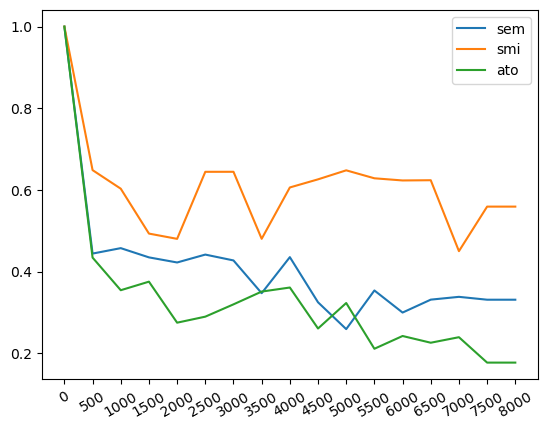

In [157]:
word_cnt = []
sem = []
smi = []
ato = []

for i in np.arange(0, 8500, 500):
    name_list = df_decomp[df_decomp.word_freq >= i].name
    word_cnt.append(len(name_list))
    sem_label_new = spect_clustering(df_sem.loc[name_list, name_list], number=6)
    smi_label_new = spect_clustering(df_smi.loc[name_list, name_list], number=6)
    ato_label_new = spect_clustering(df_ato.loc[name_list, name_list], number=6)

    sem.append(adjusted_rand_score(df_decomp.loc[name_list].semantic_label, sem_label_new))
    smi.append(adjusted_rand_score(df_decomp.loc[name_list].smile_label, smi_label_new))
    ato.append(adjusted_rand_score(df_decomp.loc[name_list].atomic_label, ato_label_new))
plt.plot(np.arange(0, 8500, 500), sem, label="sem")
plt.plot(np.arange(0, 8500, 500), smi, label="smi")
plt.plot(np.arange(0, 8500, 500), ato, label="ato")
plt.xticks(np.arange(0, 8500, 500), rotation=30)
plt.legend()
plt.show()
#

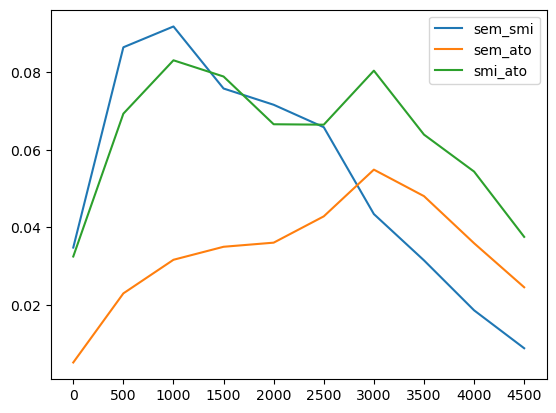

In [158]:
sem_smi = []
sem_ato = []
smi_ato = []

for i in np.arange(0, 5000, 500):
    sem_smi.append(adjusted_rand_score(df_decomp[df_decomp.word_freq >= i].semantic_label,
                                       df_decomp[df_decomp.word_freq >= i].smile_label))
    sem_ato.append(adjusted_rand_score(df_decomp[df_decomp.word_freq >= i].semantic_label,
                                       df_decomp[df_decomp.word_freq >= i].atomic_label))
    smi_ato.append(adjusted_rand_score(df_decomp[df_decomp.word_freq >= i].smile_label,
                                       df_decomp[df_decomp.word_freq >= i].atomic_label))
plt.plot(np.arange(0, 5000, 500), sem_smi, label="sem_smi")
plt.plot(np.arange(0, 5000, 500), sem_ato, label="sem_ato")
plt.plot(np.arange(0, 5000, 500), smi_ato, label="smi_ato")
plt.xticks(np.arange(0, 5000, 500))
plt.legend()
plt.show()

#new clustering on the threshold subset

In [187]:
print("Classified by Semantic\n")
for i in range(6):
    print("The {}th Cluster: \n".format(i))
    print(df_decomp[df_decomp.semantic_label == i].sort_values(by='semantic', ascending=False).head().name)

Classified by Semantic

The 0th Cluster: 

tetrathiafulvalene                                tetrathiafulvalene
dithieno[3,2-b:2',3'-d]phosphole    dithieno[3,2-b:2',3'-d]phosphole
pentaphenylbenzene                                pentaphenylbenzene
6-phenyl-2,2'-bipyridine                    6-phenyl-2,2'-bipyridine
cubane                                                        cubane
Name: name, dtype: object
The 1th Cluster: 

trimethylamine                            trimethylamine
M-MPEP                                            M-MPEP
5-Fluorouridine                          5-Fluorouridine
9-Fluorenone                                9-Fluorenone
2,4-Dinitrophenylhydrazine    2,4-Dinitrophenylhydrazine
Name: name, dtype: object
The 2th Cluster: 

2,6-diisopropylphenol                2,6-diisopropylphenol
4-Hydroxybiphenyl                        4-Hydroxybiphenyl
ergosterol-5,8-endoperoxide    ergosterol-5,8-endoperoxide
luvangetin                                      luvangetin
n

In [188]:
print("Classified by Smile")
for i in range(6):
    print("The {}th Cluster: ".format(i))
    print(df_decomp[df_decomp.smile_label == i].sort_values(by='smile', ascending=False).head().name)

Classified by Smile
The 0th Cluster: 
1-Phenyl-3-(2-thiazolyl)-2-thiourea    1-Phenyl-3-(2-thiazolyl)-2-thiourea
3-Hydroxyflavone                                          3-Hydroxyflavone
fentiazac                                                        fentiazac
chalcone                                                          chalcone
2-methylfuran                                                2-methylfuran
Name: name, dtype: object
The 1th Cluster: 
2-bromo-2-nitropropane-1,3-diol    2-bromo-2-nitropropane-1,3-diol
D-Ribose                                                  D-Ribose
1,3-thiazolidine-2-thione                1,3-thiazolidine-2-thione
5-Bromo-2'-deoxyuridine                    5-Bromo-2'-deoxyuridine
chlorofluoromethane                            chlorofluoromethane
Name: name, dtype: object
The 2th Cluster: 
prieurianin            prieurianin
trans-Chlordane    trans-Chlordane
cis-Chlordane        cis-Chlordane
7-Epiclusianone    7-Epiclusianone
AT1                     

In [161]:
print("Classified by Atomic")
for i in range(6):
    print("The {}th Cluster: ".format(i))
    print(df_decomp[df_decomp.atomic_label == i].sort_values(by='atomic', ascending=False).head().name)

Classified by Atomic
The 0th Cluster: 
l-Canavanine                                          l-Canavanine
5-Hydroxymethyl-2'-deoxyuridine    5-Hydroxymethyl-2'-deoxyuridine
N-Nitrosodiphenylamine                      N-Nitrosodiphenylamine
p-Nitrotoluene                                      p-Nitrotoluene
2-hydroxybenzamide                              2-hydroxybenzamide
Name: name, dtype: object
The 1th Cluster: 
tribromoimidazole                                        tribromoimidazole
5-Bromouracil                                                5-Bromouracil
transplatin                                                    transplatin
4,5,6,7-tetrabromo-1H-benzimidazole    4,5,6,7-tetrabromo-1H-benzimidazole
2,4,6-trichloro-1,3,5-triazine              2,4,6-trichloro-1,3,5-triazine
Name: name, dtype: object
The 2th Cluster: 
ciprofibrate                                                            ciprofibrate
tizoxanide                                                                tizo

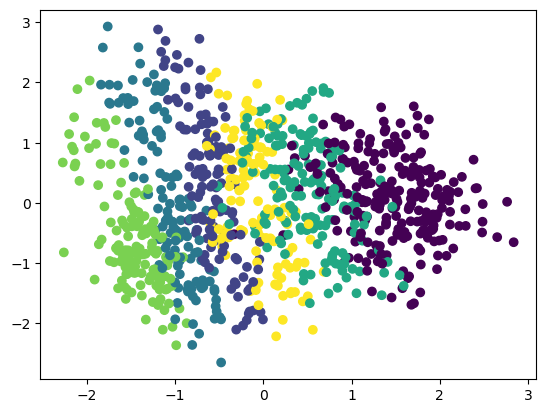

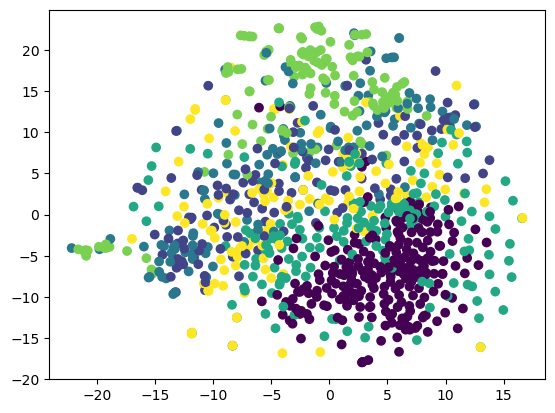

In [162]:
X_tsne = TSNE(n_components=2, random_state=33).fit_transform(np.array(list(df_add.semantic)))
X_pca = PCA(n_components=2).fit_transform(np.array(list(df_add.semantic)))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sem_label)
plt.show()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=sem_label)
plt.show()

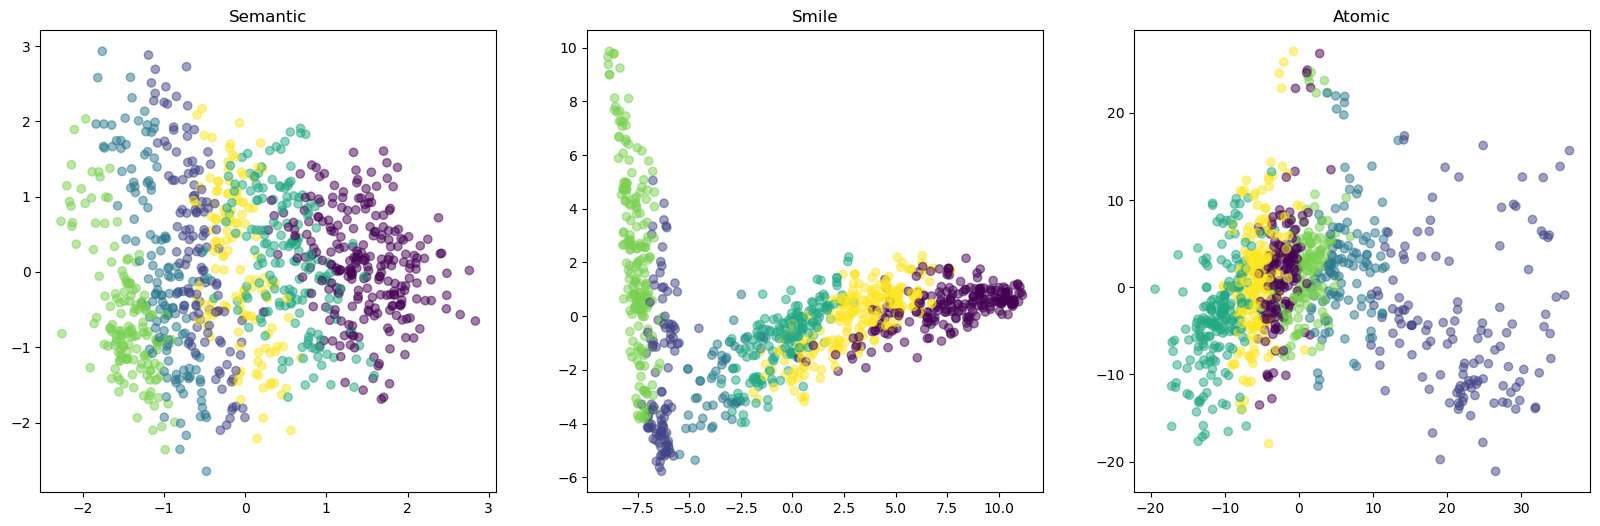

In [165]:
X1_pca = PCA(n_components=2).fit_transform(np.array(list(df_add.semantic)))
X2_pca = PCA(n_components=2).fit_transform(np.array(list(df_add.smile)))
X3_pca = PCA(n_components=2).fit_transform(np.array(list(df_add.atomic)))

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].set_title('Semantic')
axes[0].scatter(X1_pca[:, 0], X1_pca[:, 1], c=sem_label, alpha=0.5)
axes[1].set_title('Smile')
axes[1].scatter(X2_pca[:, 0], X2_pca[:, 1], c=smi_label, alpha=0.5)
axes[2].set_title('Atomic')
axes[2].scatter(X3_pca[:, 0], X3_pca[:, 1], c=ato_label, alpha=0.5)
plt.show()

Atomic not align well with semantic
Functionality
Drug dataset

Prediction based on eigenvalue